In [1]:
#import pydicom as dicom
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from functions import *
from stripthem import *

# Processing

In [2]:
path = ('D:/Uni/mri/SK_MRI/MS_dataset_full/MS/01_1/png')

In [3]:
slices = []

In [4]:
files = os.listdir(path)
for file in files:
    slices.append(cv2.imread(os.path.join(path,file),3))
  #  print(folder)

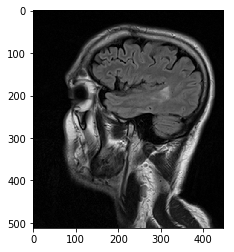

In [5]:
view(slices[4])

In [5]:
segm = strip(slices)

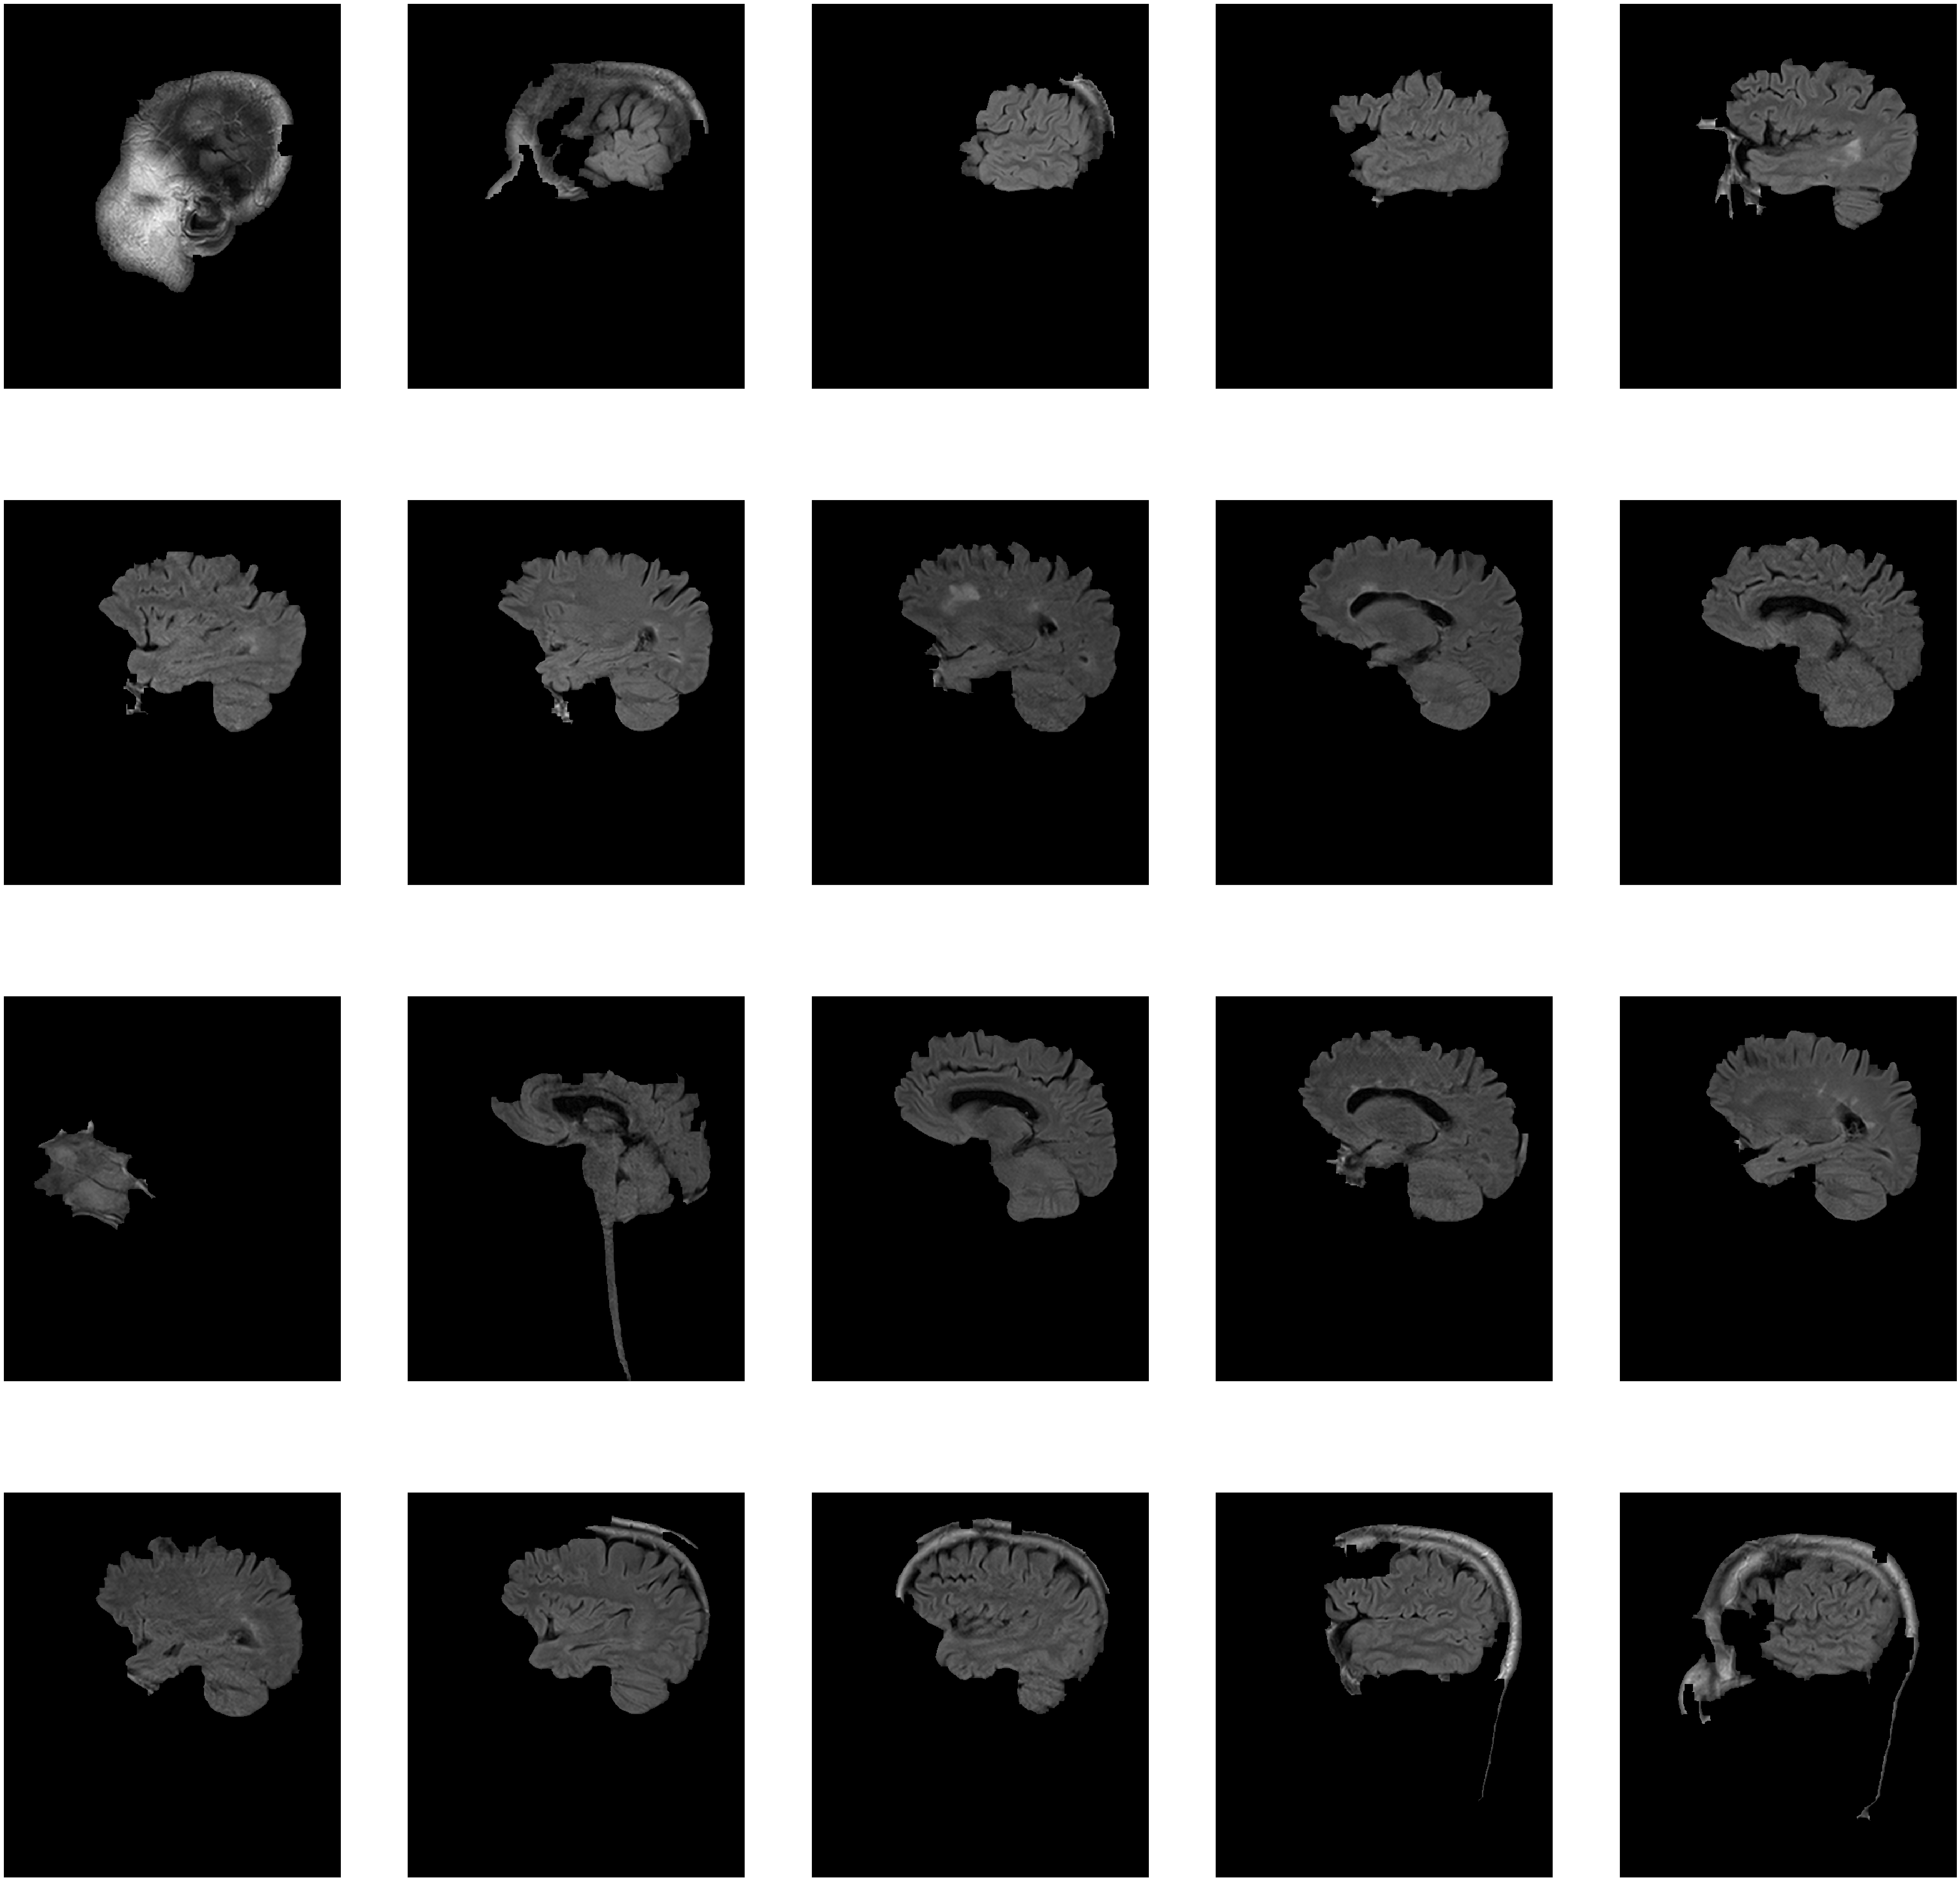

In [7]:
show(segm[:20])

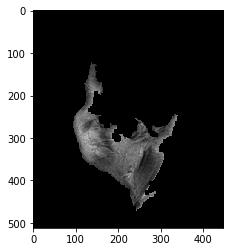

In [48]:
view(segm[20])

In [51]:
centre, mask = strip_one(slices[12])
centre1, mask1 = strip_one(slices[9])

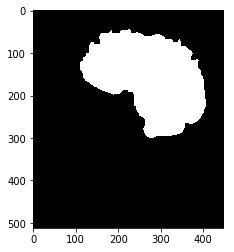

In [10]:
view(mask)

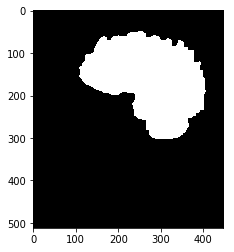

In [52]:
view(mask1)

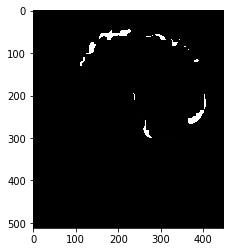

In [58]:
view(mask - mask1)

In [11]:
ex1 =  applymask(slices[4], mask)

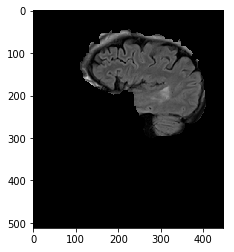

In [12]:
view(ex1)

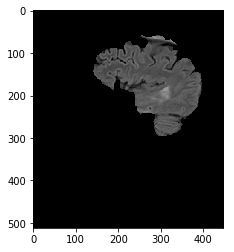

In [13]:
fourth, _ = strip_one(ex1)
view(fourth)

In [25]:
def dice(im, im1, im2):
    img1 = im.copy()
  #  img2 = im.copy()
    gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    _, thresh1 = cv2.threshold(gray1,0,255,cv2.THRESH_OTSU)
    gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    _, thresh2 = cv2.threshold(gray2,0,255,cv2.THRESH_OTSU)
    mask1 = thresh1 - thresh2
    mask2 = thresh2 - thresh1
    mask1[mask1<255]=0
    mask2[mask2<255]=0
    _,contours1,_ = cv2.findContours(mask1, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for contour in contours1:
         cv2.drawContours(img1, contour, -1, (0,255,0), thickness = 1)
    _,contours2,_ = cv2.findContours(mask2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for contour in contours2:
         cv2.drawContours(img1, contour, -1, (255,0,0), thickness = 1)
    return img1

In [ ]:
diff1, diff2 = dice(slices[4], segm[4], fourth)

In [ ]:
plt.figure(figsize = (15,15))
plt.subplot(221),plt.imshow(diff1)
plt.subplot(222),plt.imshow(diff2)
plt.subplot(223),plt.imshow(fourth)
plt.subplot(224),plt.imshow(segm[4])

In [8]:
mask = []
for slic in slices:
    _, maskk = strip_one(slic)
    mask.append(maskk)

In [29]:
diff = []
for i in range(0,len(mask)):
    dif = mask[9] - mask[i]
    diff.append(dif)    

In [30]:
len(diff)

22

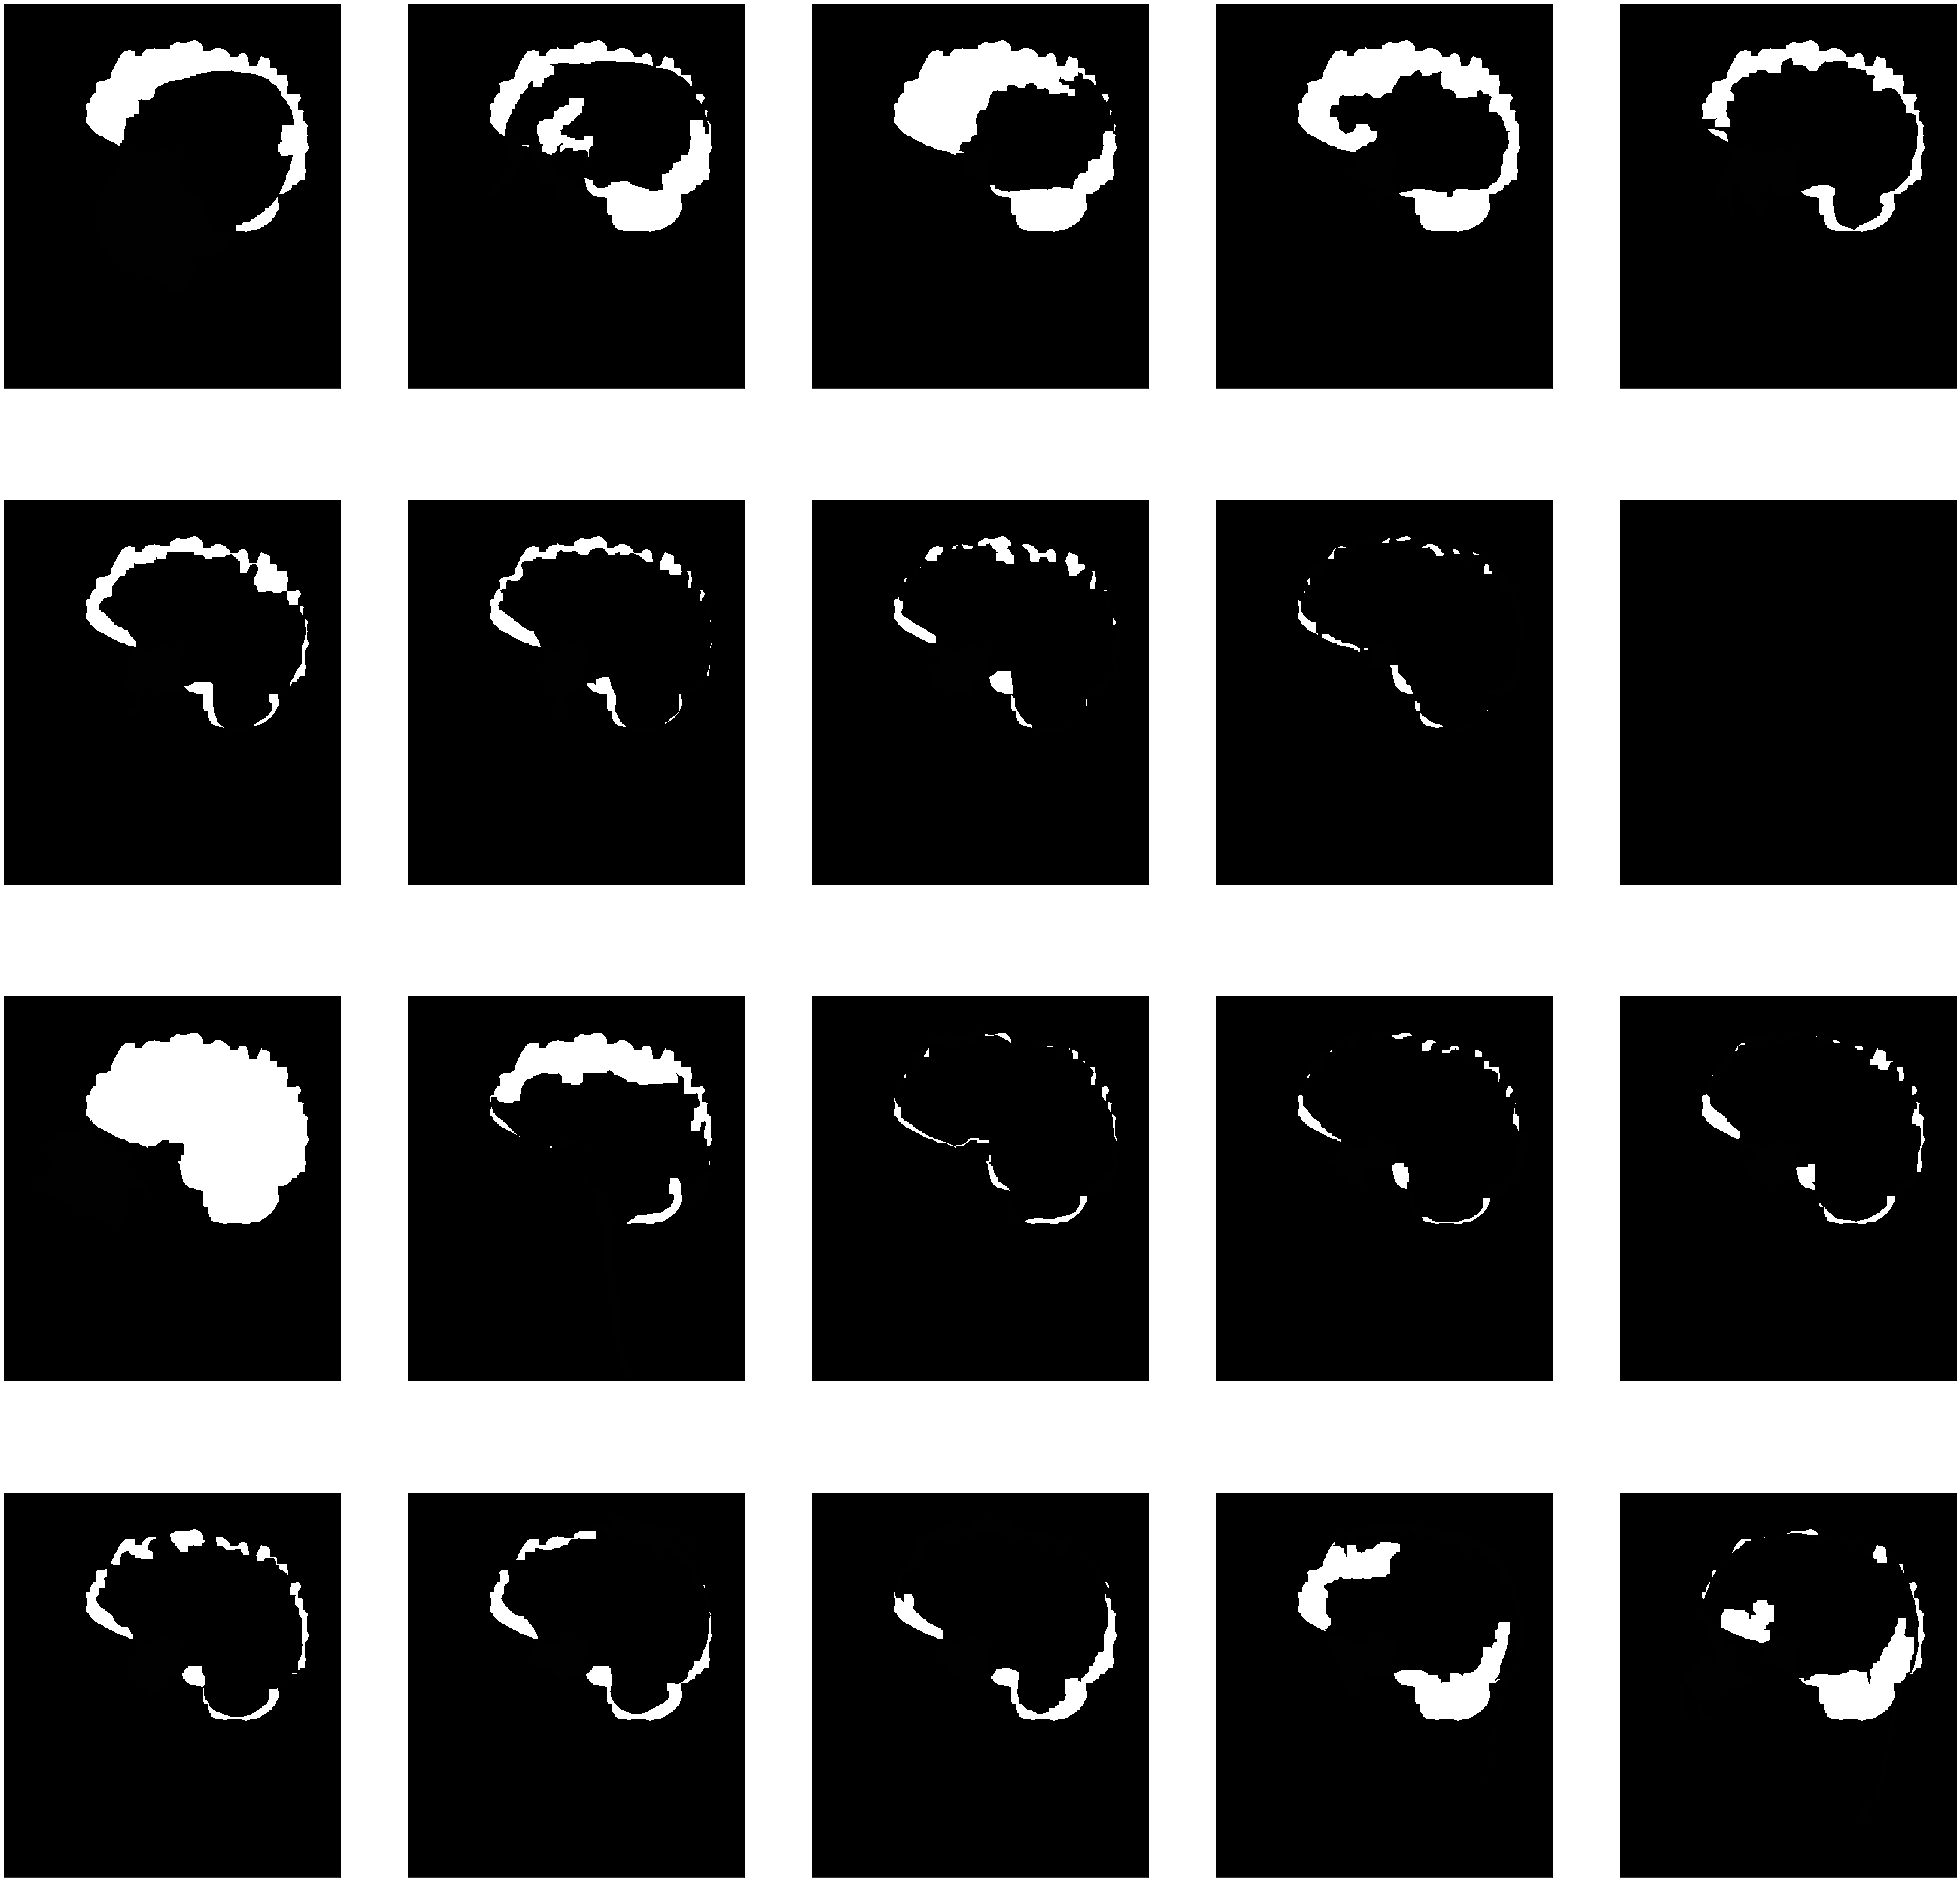

In [31]:
show(diff[:20])

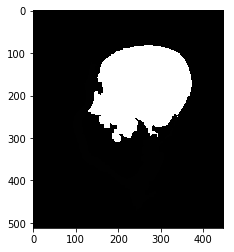

In [28]:
view(diff[20])